# Ранжирование

Таблица с которой будем работать `employees`:

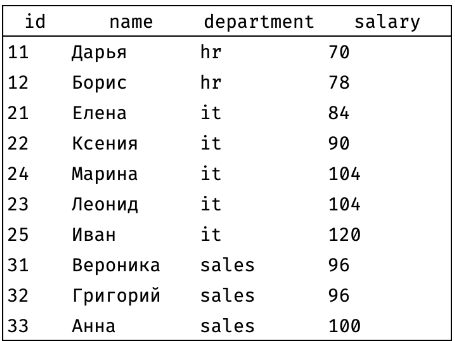

### 1 Ранг по имени

Предположим, мы хотим ранжировать сотрудников по имени (по алфавиту от А к Я):

In [ ]:
SELECT dense_rank() OVER w AS rank,
       name, 
       department, 
       salary
  FROM employees
WINDOW w AS •••
 ORDER BY rank, id;

Что должно быть вместо ••• ?

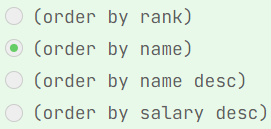

### 2 Рейтинг зарплат по городам

В компании работают сотрудники из Москвы и Самары. Предположим, мы решили ранжировать их по зарплате внутри каждого города. И еще будем ранжировать от меньшей зарплаты к большей.

Посчитаем рейтинг:

In [ ]:
SELECT dense_rank() OVER w AS rank,
       city, 
       name, 
       salary
  FROM employees
WINDOW w AS •••
 ORDER BY city, rank, id;

Что должно быть вместо ••• ?

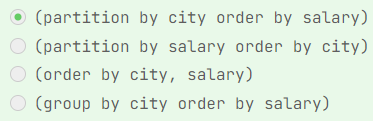

### 3 Группы по зарплате в каждом из городов

Есть таблица сотрудников `employees`. В компании работают сотрудники из Москвы и Самары. Мы хотим разбить их на две группы по зарплате в каждом из городов, вот так:

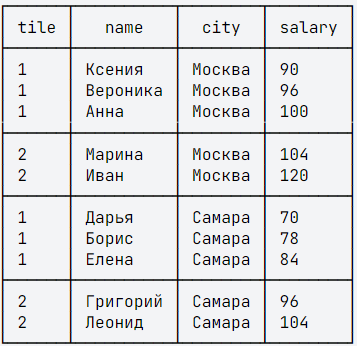

Напишите запрос, который это сделает.

Сортировка результата:  city, salary

In [ ]:
SELECT ntile(2) OVER w AS tile,
       name, 
       city, 
       salary
  FROM employees
WINDOW w AS (PARTITION BY city
             ORDER BY salary)
 ORDER BY city, salary

### 4. Самые «дорогие» коллеги

Есть таблица сотрудников `employees`. Мы хотим узнать самых высокооплачиваемых людей по каждому департаменту:

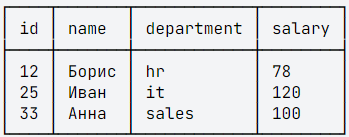

Напишите запрос, который это сделает.

Первый способ решения:

In [ ]:
SELECT id, 
       name, 
       department, 
       salary
  FROM (SELECT dense_rank() OVER w AS rank, 
               id, 
               name, 
               department, 
               salary
          FROM employees
WINDOW w AS (PARTITION BY department
             ORDER BY salary DESC)) AS sq
WHERE rank = 1

Второй способ решения:

In [ ]:
WITH data AS (SELECT id, 
                     name, 
                     department, 
                     salary,
                     dense_rank() OVER w AS rank
                FROM employees
              WINDOW w AS (PARTITION BY department 
                           ORDER BY salary DESC))
SELECT id, 
       name, 
       department, 
       salary
  FROM data
 WHERE rank = 1